In [ ]:
pip install opencv-python-headless

In [ ]:
#Open de video files and check how many frames do they contain

import cv2
import os
import pandas as pd

def count_frames(video_path):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    
    # Check if the video was opened successfully
    if not video.isOpened():
        print("Error: Could not open video.")
        return 0
    
    # Get the frame count
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
    
    # Release the video object
    video.release()
    
    return frame_count

video_path1 = '/.../project-cv/parking/parking_1920_1080.mp4'  #Path to video 'parking_1920_1080.mp4'
video_path2 = '/.../project-cv/parking/parking_crop.mp4' #Path to video 'parking_crop.mp4'
total_frames1 = count_frames(video_path1)
total_frames2 = count_frames(video_path2)
print(f"Total number of frames for 'parking_1920_1080.mp4': {total_frames1}")
print(f"Total number of frames for 'parking_crop.mp4': {total_frames2}")


In [ ]:
#Export and save all the frames in a folder



def export_frames(video_path, output_folder):
    # Open the video file
    video = cv2.VideoCapture(video_path)
    
    # Check if the video was opened successfully
    if not video.isOpened():
        print("Error: Could not open video.")
        return
    
    # Create the output folder if it doesn't exist
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    frame_count = 0
    while True:
        # Read a frame from the video
        ret, frame = video.read()
        
        # If the frame was not read successfully, break the loop
        if not ret:
            break
        
        # Save the frame as an image
        frame_filename = os.path.join(output_folder, f"frame_{frame_count:04d}.jpg")
        cv2.imwrite(frame_filename, frame)
        
        frame_count += 1
    
    # Release the video object
    video.release()
    print(f"Exported {frame_count} frames to {output_folder}")

video_path = '/.../project-cv/parking/parking_1920_1080.mp4' #Path to the video parking_1920_1080.mp4
output_folder = '/.../project-cv/parking/frames' #path to create a new folder containing all video frames
export_frames(video_path, output_folder)


In [ ]:
#Same for the video parking_crop.mp4

video_path2 = '/.../project-cv/parking/parking_crop.mp4' #Path to video parking_crop.mp4
output_folder2 = '/.../project-cv/parking/parking_crop.mp4-frames' #path to create a new folder containing all video frames
export_frames(video_path2, output_folder2)


In [ ]:

#Load the mask and a frame example --> display frame and masked frame

import matplotlib.pyplot as plt

# Load the frame and the mask
frame_path = '...' #Path to a sprecific frame to apply the mask in your system
mask_path = '...' #Path to the mask

frame = cv2.imread(frame_path)
mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

# Resize the mask to match the frame dimensions
resized_mask = cv2.resize(mask, (frame.shape[1], frame.shape[0]))

# Check the shapes of the loaded images
print(f"Frame shape: {frame.shape}")
print(f"Mask shape: {mask.shape}")

# Convert mask to binary
_, binary_mask = cv2.threshold(resized_mask, 127, 255, cv2.THRESH_BINARY)

# Create a masked frame using bitwise operations
masked_frame = cv2.bitwise_and(frame, frame, mask=binary_mask)

# Display the frame, resized mask, and masked frame
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
axs[0].set_title('Frame')
axs[0].axis('off')

axs[1].imshow(resized_mask, cmap='gray')
axs[1].set_title('Resized Mask')
axs[1].axis('off')

axs[2].imshow(cv2.cvtColor(masked_frame, cv2.COLOR_BGR2RGB))
axs[2].set_title('Masked Frame')
axs[2].axis('off')

plt.show()


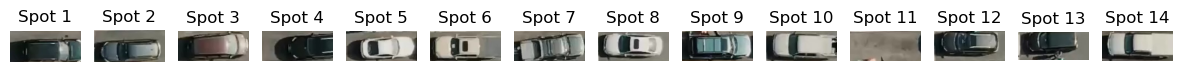

In [26]:
#Display each parking spot separetely from a especific frame. In this case "frame_0000.jpg"

# Load the frame and the mask
frame_path = '...' #Path to a sprecific frame to apply the mask in your system
mask_path = '...' #Path to the mask

frame = cv2.imread(frame_path)
mask = cv2.imread(mask_path, cv2.IMREAD_UNCHANGED)

# Resize the mask to match the frame dimensions
resized_mask = cv2.resize(mask, (frame.shape[1], frame.shape[0]))

# Convert mask to binary
_, binary_mask = cv2.threshold(resized_mask, 127, 255, cv2.THRESH_BINARY)

# Find contours in the binary mask
contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create a list to store each parking spot region
parking_spots = []

# Extract regions for each parking spot
for contour in contours:
    x, y, w, h = cv2.boundingRect(contour)
    parking_spot = frame[y:y+h, x:x+w]
    parking_spots.append(parking_spot)

# Display the parking spots
fig, axs = plt.subplots(1, len(parking_spots), figsize=(15, 5))

for idx, spot in enumerate(parking_spots):
    axs[idx].imshow(cv2.cvtColor(spot, cv2.COLOR_BGR2RGB))
    axs[idx].set_title(f'Spot {idx+1}')
    axs[idx].axis('off')

plt.show()


In [22]:
#Iterate over all the frames in the folder of frames (created before) and do the same proces of splitting by spots. Save all spots in an list. Convert the list into a np array
#

# Define the paths
frames_folder = '...' #Path to the folder of all frames in your system
mask_path = '...' #Path to the mask
output_file = '...' #Path for the new file creation, in case you want/need

# Load the mask
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
if mask is None:
    raise ValueError(f"Mask image not found or could not be loaded at {mask_path}")

all_parking_spots = []

# Process each frame in the folder
for frame_filename in sorted(os.listdir(frames_folder)):
    if frame_filename.endswith('.jpg'):
        # Load the frame
        frame_path = os.path.join(frames_folder, frame_filename)
        frame = cv2.imread(frame_path)
        
        if frame is None:
            print(f"Frame {frame_path} could not be loaded. Skipping.")
            continue
        
        # Ensure the mask fits the frame
        mask_resized = cv2.resize(mask, (frame.shape[1], frame.shape[0]))
        
        # Extract parking spots
        parking_spots = []
        contours, _ = cv2.findContours(mask_resized, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        for cnt in contours:
            x, y, w, h = cv2.boundingRect(cnt)
            spot = frame[y:y+h, x:x+w]
            parking_spots.append(spot)
        
        # Append parking spots for the current frame to the main list
        all_parking_spots.append(parking_spots)

# Convert the list to a numpy array for easy handling
all_parking_spots_array = np.array(all_parking_spots, dtype=object)

'''
# Save the array to a file
np.save(output_file, all_parking_spots_array)
print(f"Parking spots saved to {output_file}")
'''



Parking spots saved to /Users/gerardroca/Documents/IRONHACK/PROJECTS/project-cv/parking/parking_spots.npy


In [23]:
# Number of frames and spots per frame
total_frames = len(all_parking_spots_array)
spots_per_frame = len(all_parking_spots_array[0])

# Sample spot from the first frame
sample_spot = all_parking_spots_array[0][0]  # First spot from the first frame

(total_frames, spots_per_frame, sample_spot.shape)


(849, 14, (60, 131, 3))

In [25]:
first_spot_first_frame = all_parking_spots_array[0][0]
first_spot_first_frame


array([[[198, 203, 202],
        [197, 202, 201],
        [197, 202, 201],
        ...,
        [134, 143, 152],
        [132, 141, 150],
        [138, 147, 156]],

       [[195, 200, 199],
        [197, 202, 201],
        [199, 204, 203],
        ...,
        [ 96, 105, 114],
        [ 98, 107, 116],
        [102, 111, 120]],

       [[127, 132, 133],
        [127, 132, 133],
        [127, 132, 133],
        ...,
        [111, 120, 129],
        [117, 126, 135],
        [115, 124, 133]],

       ...,

       [[ 44,  40,  35],
        [ 44,  40,  35],
        [ 43,  39,  34],
        ...,
        [185, 196, 200],
        [130, 141, 145],
        [ 80,  91,  95]],

       [[ 47,  42,  39],
        [ 47,  42,  39],
        [ 46,  41,  38],
        ...,
        [143, 154, 162],
        [144, 155, 163],
        [137, 148, 156]],

       [[ 48,  45,  41],
        [ 48,  45,  41],
        [ 47,  44,  40],
        ...,
        [172, 187, 196],
        [171, 183, 193],
        [164, 179, 188]]